100%|██████████| 9.91M/9.91M [00:00<00:00, 18.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.42MB/s]


Epoch 1: D_loss=0.685, G_loss=1.280
Epoch 2: D_loss=1.242, G_loss=0.925
Epoch 3: D_loss=0.501, G_loss=1.493
Epoch 4: D_loss=0.491, G_loss=1.642
Epoch 5: D_loss=0.802, G_loss=1.337


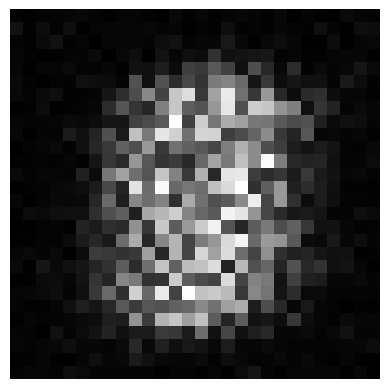

In [ ]:
import torch, torch.nn as nn, torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data
data = DataLoader(datasets.MNIST('.', train=True, download=True,
               transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])),
               batch_size=64, shuffle=True)

# Generator & Discriminator
G = nn.Sequential(nn.Linear(100, 256), nn.ReLU(), nn.Linear(256, 784), nn.Tanh())
D = nn.Sequential(nn.Linear(784, 256), nn.LeakyReLU(0.2), nn.Linear(256, 1), nn.Sigmoid())
opt_G = optim.Adam(G.parameters(), lr=0.0002)
opt_D = optim.Adam(D.parameters(), lr=0.0002)
loss = nn.BCELoss()

# Train
for epoch in range(5):  # few epochs for quick training
    for real, _ in data:
        real = real.view(-1, 784)
        z = torch.randn(real.size(0), 100)
        fake = G(z)

        # Discriminator
        D_real = D(real)
        D_fake = D(fake.detach())
        loss_D = loss(D_real, torch.ones_like(D_real)) + loss(D_fake, torch.zeros_like(D_fake))
        opt_D.zero_grad(); loss_D.backward(); opt_D.step()

        # Generator
        D_fake = D(fake)
        loss_G = loss(D_fake, torch.ones_like(D_fake))
        opt_G.zero_grad(); loss_G.backward(); opt_G.step()

    print(f"Epoch {epoch+1}: D_loss={loss_D.item():.3f}, G_loss={loss_G.item():.3f}")

# Generate sample
z = torch.randn(1, 100)
img = G(z).view(28, 28).detach()
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.show()
